In [54]:
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()

# Data Preprocessing

In [55]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
dfTeste = df.copy()

q1 = dfTeste['sepal width (cm)'].quantile(0.25)
q3 = dfTeste['sepal width (cm)'].quantile(0.75)
iqr = q3-q1
lLim = q1 - 1.5 * iqr
hLim = q3 + 1.5 * iqr
print(lLim)
print(hLim)

dfTeste.loc[dfTeste['sepal width (cm)'] < lLim, 'sepal width (cm)'] = lLim
dfTeste.loc[dfTeste['sepal width (cm)'] > hLim, 'sepal width (cm)'] = hLim

2.05
4.05


<Axes: >

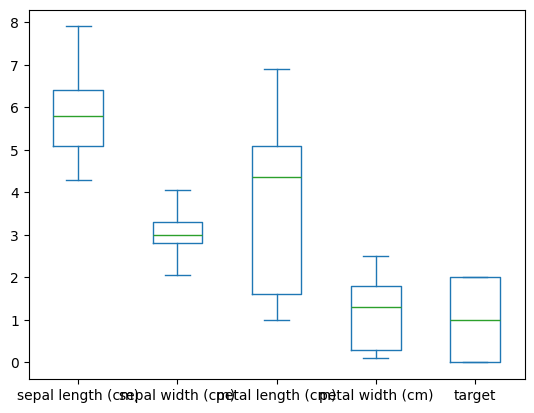

In [57]:
dfTeste.plot(kind = 'box')

# Ajustes de Hiperparâmetros

In [58]:
data = dfTeste[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
target = dfTeste['target']

In [59]:
# Cross validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {"n_neighbors": range(1, 40, 2), 'weights': ['uniform', 'distance']}

grid_search = GridSearchCV(knn, param_grid, cv=5, return_train_score=True, verbose=1)
grid_search.fit(data, target)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 40, 2),
                         'weights': ['uniform', 'distance']},
             return_train_score=True, verbose=1)

In [60]:
# Best parameters
grid_search.best_params_

{'n_neighbors': 11, 'weights': 'distance'}

In [61]:
dfGridSearch = pd.DataFrame(grid_search.cv_results_)
dfGridSearch.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.007431,0.006372,0.011286,0.004037,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.966667,0.966667,0.933333,...,0.960000,0.024944,30,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,0.000000
1,0.004662,0.000762,0.006769,0.002752,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.966667,0.966667,0.933333,...,0.960000,0.024944,30,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,0.000000
2,0.003965,0.001363,0.010039,0.002984,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.966667,0.966667,0.933333,...,0.966667,0.021082,17,0.958333,0.958333,0.966667,0.966667,0.950000,0.96,0.006236
3,0.003799,0.000978,0.005510,0.001111,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.966667,0.966667,0.933333,...,0.966667,0.021082,17,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,0.000000
4,0.004111,0.000996,0.008403,0.002524,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.966667,1.000000,0.933333,...,0.973333,0.024944,7,0.966667,0.966667,0.975000,0.975000,0.966667,0.97,0.004082


In [62]:
# Show all ranks = 1

dfGridSearch[dfGridSearch['rank_test_score'] < 5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
6,0.006325,0.004363,0.010450,0.003513,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.966667,1.0,0.966667,...,0.980000,0.016330,2,0.966667,0.966667,0.975,0.983333,0.975000,0.973333,0.006236
7,0.004289,0.000881,0.005128,0.001256,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.966667,1.0,0.966667,...,0.980000,0.016330,2,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,0.000000
10,0.004853,0.001183,0.008594,0.001884,11,uniform,"{'n_neighbors': 11, 'weights': 'uniform'}",0.933333,1.0,1.000000,...,0.980000,0.026667,2,0.983333,0.975000,0.975,0.975000,0.966667,0.975000,0.005270
11,0.003195,0.001596,0.003809,0.002420,11,distance,"{'n_neighbors': 11, 'weights': 'distance'}",0.966667,1.0,1.000000,...,0.986667,0.016330,1,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,0.000000
13,0.004842,0.001245,0.005019,0.000632,13,distance,"{'n_neighbors': 13, 'weights': 'distance'}",0.966667,1.0,0.966667,...,0.980000,0.016330,2,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,0.000000
23,0.003442,0.000836,0.003026,0.001138,23,distance,"{'n_neighbors': 23, 'weights': 'distance'}",0.966667,1.0,0.966667,...,0.980000,0.016330,2,1.000000,1.000000,1.000,1.000000,1.000000,1.000000,0.000000


# Breast Cancer

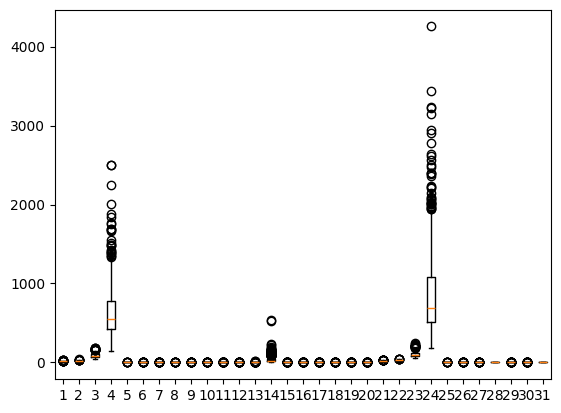

In [119]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
data = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)
data['target'] = pd.Series(dataset.target)

plt.boxplot(data)
plt.show()

In [120]:
data.target.value_counts()

target
1    357
0    212
Name: count, dtype: int64

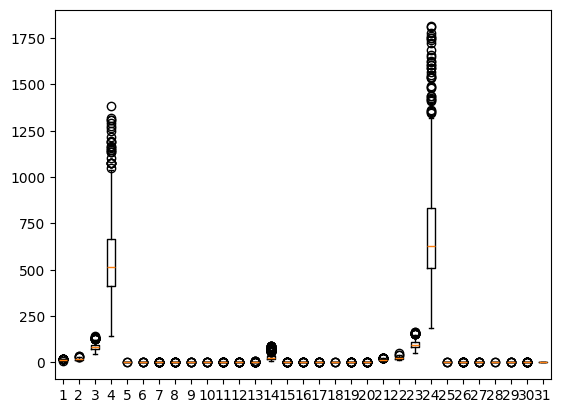

In [121]:
# Remove outliers
for column in data.columns:
    if column != 'target':
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3-q1
        lLim = q1 - 2.5 * iqr
        hLim = q3 + 2.5 * iqr
        data = data[(data[column] >= lLim) & (data[column] <= hLim)]

# Plot boxplot without verbose
plt.boxplot(data)
plt.show()

In [122]:
data.target.value_counts()

target
1    326
0    117
Name: count, dtype: int64

Obs.: A nova quantidade da classe 0 diminui muito com a remoção dos outliers, o que indica que não é uma boa ideia realizar essa remoção

In [123]:
target = data['target']
data = data.drop(columns='target')

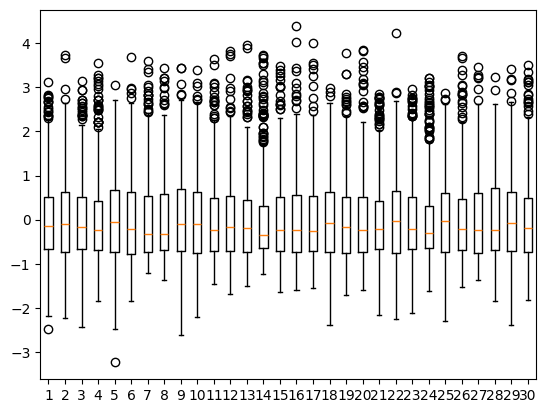

In [124]:
# Normalização standart scallar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)

plt.boxplot(data)
plt.show()

In [125]:
# Cross validation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
param_grid = {"n_neighbors": range(5, 50, 2), 'weights': ['uniform', 'distance']}

grid_search = GridSearchCV(knn, param_grid, cv=5, return_train_score=True)
grid_search.fit(data, target)

score = pd.DataFrame(grid_search.cv_results_)

# Best parameters
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

# Predict with best model
y_pred = best_model.predict(data)

# Metrics
print('Accuracy:', accuracy_score(target, y_pred))
print('Precision:', precision_score(target, y_pred))
print('Recall:', recall_score(target, y_pred))
print('F1:', f1_score(target, y_pred))

Best parameters: {'n_neighbors': 7, 'weights': 'uniform'}
Accuracy: 0.9683972911963883
Precision: 0.9642857142857143
Recall: 0.9938650306748467
F1: 0.9788519637462235
